In [4]:
import matplotlib.pyplot as plt
import numpy as np

from dst import *

%matplotlib inline

In [5]:
def DFT(fnList):
    N = len(fnList)
    FmList = np.zeros(N,dtype='complex')
    for m in range(N):
        for n in range(N):
            FmList[m] += fnList[n] * np.exp(- 2j * np.pi * m * n / N)
    return FmList

def iDFT(FmList):
    N = len(FmList)
    fnList = np.zeros(N,dtype='complex')
    for n in range(N):
        for m in range(N):
            fnList[n] += FmList[m] * np.exp(2j * np.pi * m * n / N)
    return fnList/N

In [6]:
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    
    N_2 = int(N/2)
    k = np.arange(N_2)
    T= np.exp(-2j*np.pi*k/N)*odd
    return np.append(even + T ,even - T)

def ifft(x):
    x = x.real - 1j*x.imag
    res = fft(x)/len(x)
    return res.real - 1j*res.imag

In [7]:
def DFT2(fnList):
    fnList = fnList.astype('complex')
    n_x,n_y = fnList.shape
    
    for x in range(n_x):
        fnList[x,:] = DFT(fnList[x,:])
    
    for y in range(n_y):
        fnList[:,y] = DFT(fnList[:,y])
        
    return fnList

def iDFT2(FmList):
    FmList = FmList.astype('complex')
    n_x,n_y = FmList.shape
    
    for y in range(n_y):
        FmList[:,y] = iDFT(FmList[:,y])    
    
    for x in range(n_x):
        FmList[x,:] = iDFT(FmList[x,:])
    return FmList

In [8]:
def fft2(x):
    x = x.astype('complex')
    n_x,n_y = x.shape
    
    for i in range(n_x):
        x[i,:] = fft(x[i,:])
    
    for j in range(n_y):
        x[:,j] = fft(x[:,j])
    
    return x


def ifft2(x):
    x = x.astype('complex')
    n_x, n_y = x.shape

    for j in range(n_y):
        x[:,j] = ifft(x[:,j])    
    
    for i in range(n_x):
        x[i,:] = ifft(x[i,:])
        
    return x

In [9]:
def create_right(N):
    b = np.zeros((N,N))
    l = np.linspace(0,np.pi,N)
    for i in range(N):
        for j in range(N):
            x = l[i]
            y = l[j]
            b[i,j]  = 30 * ( (x/np.pi)**2 - x/np.pi )
            b[i,j] += 30 * ( (y/np.pi)**2 - y/np.pi )
            b[i,j] -= 4 * np.pi**2 * (x/np.pi - 1) * np.sin(2*y)
            b[i,j] /= np.pi**2
    return b

In [10]:
def create_solution(N):
    sol = np.zeros((N,N))
    x = np.linspace(0,np.pi,N,endpoint=False)
    y = x
    for i in range(N):
        for j in range(N):
            sol[i,j] = 15 *(((x[i]/np.pi)**2 - x[i]/np.pi)  * ((y[j]/np.pi)**2 - y[j]/np.pi))
            sol[i,j] -= np.sin(2*y[j]) * np.sinh(2*np.pi*(x[i]/np.pi -1))/np.sinh(2*np.pi)
            sol[i,j] +=(x[i]/np.pi -1 )* np.sin(2*y[j])
    return sol

In [11]:
N = 128
f = create_right(N)
x = create_solution(N)

In [12]:
F = np.fft.fft2(f)
U = np.zeros_like(F)

for i in range(N):
    for j in range(N):
        if i != 0 and j != 0:
            U[i,j] = - F[i,j]/ (i**2+j**2)

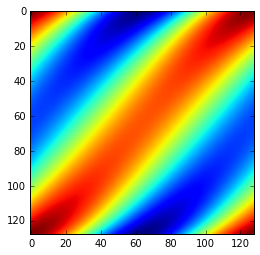

In [13]:
plt.imshow(np.fft.ifft2(U).real)

In [14]:
f = create_right(16)

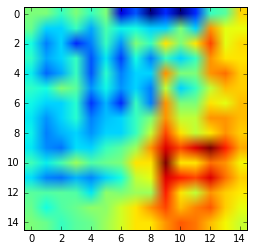

In [22]:
plt.imshow(idst2(dst2(f))[1:,1:]- f[1:,1:])